In [1]:
from sklearn import tree
import pandas as pd
import os
import numpy as np
import matplotlib. pyplot as plt

In [2]:
All_Positions = pd.read_csv('../Resources/total_combined_data_no_game_location.csv')
All_Positions = All_Positions[All_Positions['year']>=2010]
All_Positions = All_Positions[All_Positions['total_combined_fantasy_points']> 64]
QB_only = All_Positions[All_Positions['position_cleaned']=='QB']
QB_stats = QB_only[['player_id','passing_completions', 'total_combined_fantasy_points','total_passing_fantasy_points','year']]
QB_stats.dtypes


player_id                          int64
passing_completions                int64
total_combined_fantasy_points    float64
total_passing_fantasy_points     float64
year                               int64
dtype: object

In [3]:
Offensive_Players = pd.read_csv('../Resources/offensive_players.csv')
Name_Id = Offensive_Players[['player_id', 'name']]
Name_Id

,player_id,name
0,18182,Steve Ramsey
1,4310,Jerome Collins
2,13379,Hub Lindsey
3,11755,LaMont Jordan
4,24331,Jeff Wilner
...,...,...
7916,13402,Jonathan Linton
7917,12824,Mike Landrum
7918,15903,Rick Moser
7919,19372,Brandon Saine


In [4]:
QB_stats_cleaned = QB_stats.dropna()
QB_stats_cleaned

,player_id,passing_completions,total_combined_fantasy_points,total_passing_fantasy_points,year
773,6975,441,230.90,204.00,2010
774,6975,569,250.78,229.28,2011
775,6975,505,243.70,218.00,2012
776,6975,350,178.66,137.16,2013
777,6975,312,194.72,164.32,2014
...,...,...,...,...,...
27117,9351,525,211.14,187.24,2010
27118,9351,518,209.04,203.84,2011
27119,9351,221,76.48,72.68,2012
27122,9351,256,97.10,95.60,2015


In [27]:
#Select column 1 (passing_completions) as X
X = QB_stats_cleaned.iloc[:, 1:2].values
#print(X)
#Select column 2 (total_combined_fantasy_points) as y
y = QB_stats_cleaned.iloc[:, 2].values
#print(y)

In [28]:
from sklearn.ensemble import RandomForestRegressor
#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

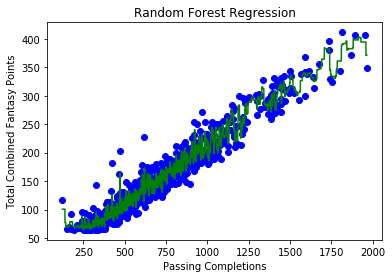

In [37]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Passing Completions')
plt.ylabel('Total Combined Fantasy Points')
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
#Select column 1 (passing_completions) as X
X = QB_stats_cleaned.iloc[:, 1:2].values
#Select column 2 (total_combined_fantasy_points) as y
y = QB_stats_cleaned.iloc[:, 2].values

def rfr_model(X,y):
    #grid search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth':range(3,7),
            'n_estimators':(10,50,100,1000)
        },
        cv=5, scoring='neg_mean_squared_error',verbose=0,
n_jobs=-1)

    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"],
n_estimators=best_params["n_estimators"], 
random_state=False, verbose=False)
#K-Fold CV
    scores = cross_val_score(rfr,X,y,cv=10,
scoring='neg_mean_absolute_error')
    predictions = cross_val_predict(rfr, X, y, cv=10)
    #print(predictions)
    print(scores)
    return predictions

temp = rfr_model(X,y)


[-42.41393133 -48.74394573 -25.15174065 -41.42641044 -53.33378329
 -27.18096078 -60.81792357 -35.37736311 -42.35852084 -55.75977537]


In [31]:
temp

array([213.80911216, 290.05848568, 276.40503128, 177.02852373,
       150.24228637, 288.87411648, 215.31538658,  93.25552899,
        93.25552899, 271.61696653, 150.24228637, 276.40503128,
        96.25479679, 152.88052322, 129.85881456, 164.94019855,
        93.45147016, 296.54051387, 129.85881456, 334.47265521,
       180.33574519, 215.12360433, 111.9667748 , 111.9667748 ,
        93.25552899, 102.96644935, 296.54051387,  95.69335509,
       276.83471924, 335.34432625, 277.09601932, 238.79985983,
        97.79134168, 206.9403073 , 220.51429327, 266.09936273,
       280.2040193 , 314.51939287, 208.55041742,  97.79134168,
       146.83947945, 148.8144708 , 280.2040193 , 280.2040193 ,
       330.18500625, 265.4885694 , 205.68359918, 280.2040193 ,
       146.83947945, 302.75401901, 315.66953913, 339.85019742,
       332.48726312, 330.18500625, 316.51984518, 330.18500625,
       192.04744514, 147.11294728,  90.99723435, 147.11294728,
       217.78259271, 102.35935455, 106.17208968,  99.92

In [32]:
QB_stats_predictions = QB_stats_cleaned
#predicted_QB_FP = pd.DataFrame(np.array(temp).T)
#predicted_QB_FP
QB_stats_predictions['predicted_score']= temp
#QB_stats_predictions

QB_predictions_names = QB_stats_predictions.join(Name_Id.set_index('player_id'), on='player_id', how='inner')
#QB_predictions_names = QB_predictions_names[QB_predictions_names['total_combined_fantasy_points']>= 64]
QB_predictions_names

,player_id,passing_completions,total_combined_fantasy_points,total_passing_fantasy_points,year,predicted_score,name
773,6975,441,230.90,204.00,2010,213.809112,Ryan Fitzpatrick
774,6975,569,250.78,229.28,2011,290.058486,Ryan Fitzpatrick
775,6975,505,243.70,218.00,2012,276.405031,Ryan Fitzpatrick
776,6975,350,178.66,137.16,2013,177.028524,Ryan Fitzpatrick
777,6975,312,194.72,164.32,2014,150.242286,Ryan Fitzpatrick
...,...,...,...,...,...,...,...
27117,9351,525,211.14,187.24,2010,270.414583,Matt Hasselbeck
27118,9351,518,209.04,203.84,2011,253.769267,Matt Hasselbeck
27119,9351,221,76.48,72.68,2012,102.349472,Matt Hasselbeck
27122,9351,256,97.10,95.60,2015,103.253483,Matt Hasselbeck


In [49]:
QB_predictions_names.to_csv('QB_predictions_names.csv', index=False)

In [33]:
#Clean data for wide receiver positioin
WR_only = All_Positions[All_Positions['position_cleaned']=='WR']
WR_stats = WR_only[['player_id','receiving_yards', 'total_combined_fantasy_points']]
WR_stats.dtypes

player_id                          int64
receiving_yards                    int64
total_combined_fantasy_points    float64
dtype: object

In [34]:
WR_stats_cleaned = WR_stats.dropna()
WR_stats_cleaned

,player_id,receiving_yards,total_combined_fantasy_points
54,19449,467,93.7
55,19449,369,77.5
56,19449,626,113.0
57,19449,740,179.5
58,19449,1450,311.4
...,...,...,...
28841,13822,564,114.3
28842,13822,350,85.0
28920,13991,944,208.6
28921,13991,712,165.2


In [35]:
#Select column 1 (receiving_yards) as X
X = WR_stats_cleaned.iloc[:, 1:2].values

#Select column 2 (total_combined_fantasy_points) as y
y = WR_stats_cleaned.iloc[:, 2].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [36]:
Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))
Y_pred

array([100.6684])

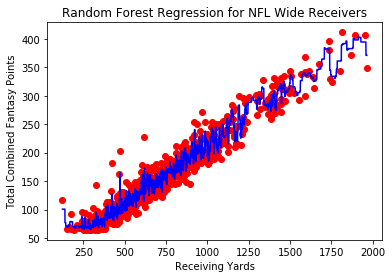

In [38]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'red')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Random Forest Regression for NFL Wide Receivers')
plt.xlabel('Receiving Yards')
plt.ylabel('Total Combined Fantasy Points')
plt.show()

In [39]:
#Clean data for running back positioin
RB_only = All_Positions[All_Positions['position_cleaned']=='RB']
RB_stats = RB_only[['player_id','rushing_yards', 'rushing_touchdowns','total_combined_fantasy_points', 'rushing_attempts']]
RB_stats_cleaned = RB_stats.dropna()
RB_stats_cleaned

,player_id,rushing_yards,rushing_touchdowns,total_combined_fantasy_points,rushing_attempts
87,17858,437,4,98.7,110
88,17858,697,1,140.1,176
90,17858,313,1,135.1,70
91,17858,722,3,199.0,131
92,17858,454,2,93.2,102
...,...,...,...,...,...
28868,10701,439,3,100.5,117
28869,10701,280,1,77.2,85
28926,7155,552,2,134.1,126
28930,7155,1435,8,273.2,275


In [40]:
#Select column 1 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 1:2].values

#Select column 3 (total_combined_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

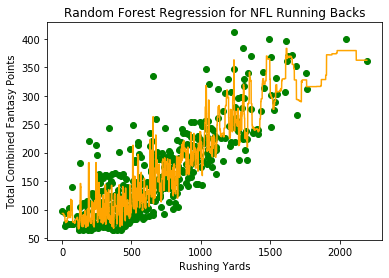

In [41]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'green')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Yards')
plt.ylabel('Total Combined Fantasy Points')
plt.show()

In [42]:
#Select column 2 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 2:3].values
#X
#Select column 3 (total_combined_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

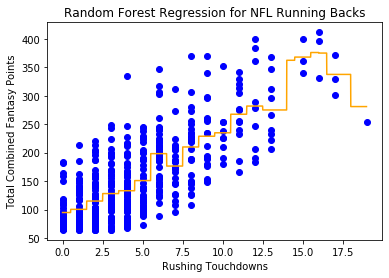

In [43]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'orange')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Touchdowns')
plt.ylabel('Total Combined Fantasy Points')
plt.show()

In [44]:
#Select column 1 (rushing_yards) as X
X = RB_stats_cleaned.iloc[:, 1:2].values
#X
#Select column 4 (rushing attempts) as y
y = RB_stats_cleaned.iloc[:, 4].values
#y
# #make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# #fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

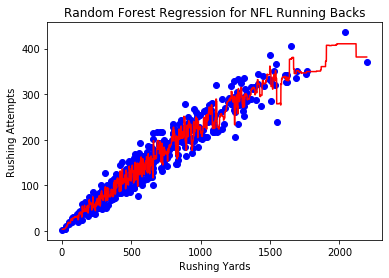

In [45]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'red')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Yards')
plt.ylabel('Rushing Attempts')
plt.show()

In [46]:
#Select column 4 (rushing_attempts) as X
X = RB_stats_cleaned.iloc[:, 4:5].values
#X
#Select column 3 (total_combined_fantasy_points) as y
y = RB_stats_cleaned.iloc[:, 3].values

#make a regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
#fit the regressor with X and y data
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

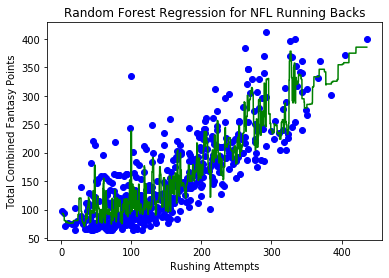

In [47]:
#Visualize the Random Forest Regression Results
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
#scatter plot of data
plt.scatter(X,y, color = 'blue')
#plot of predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'green')
plt.title('Random Forest Regression for NFL Running Backs')
plt.xlabel('Rushing Attempts')
plt.ylabel('Total Combined Fantasy Points')
plt.show()